In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

# MF15

Drop cast nanotubes with sputtered niobium leads.

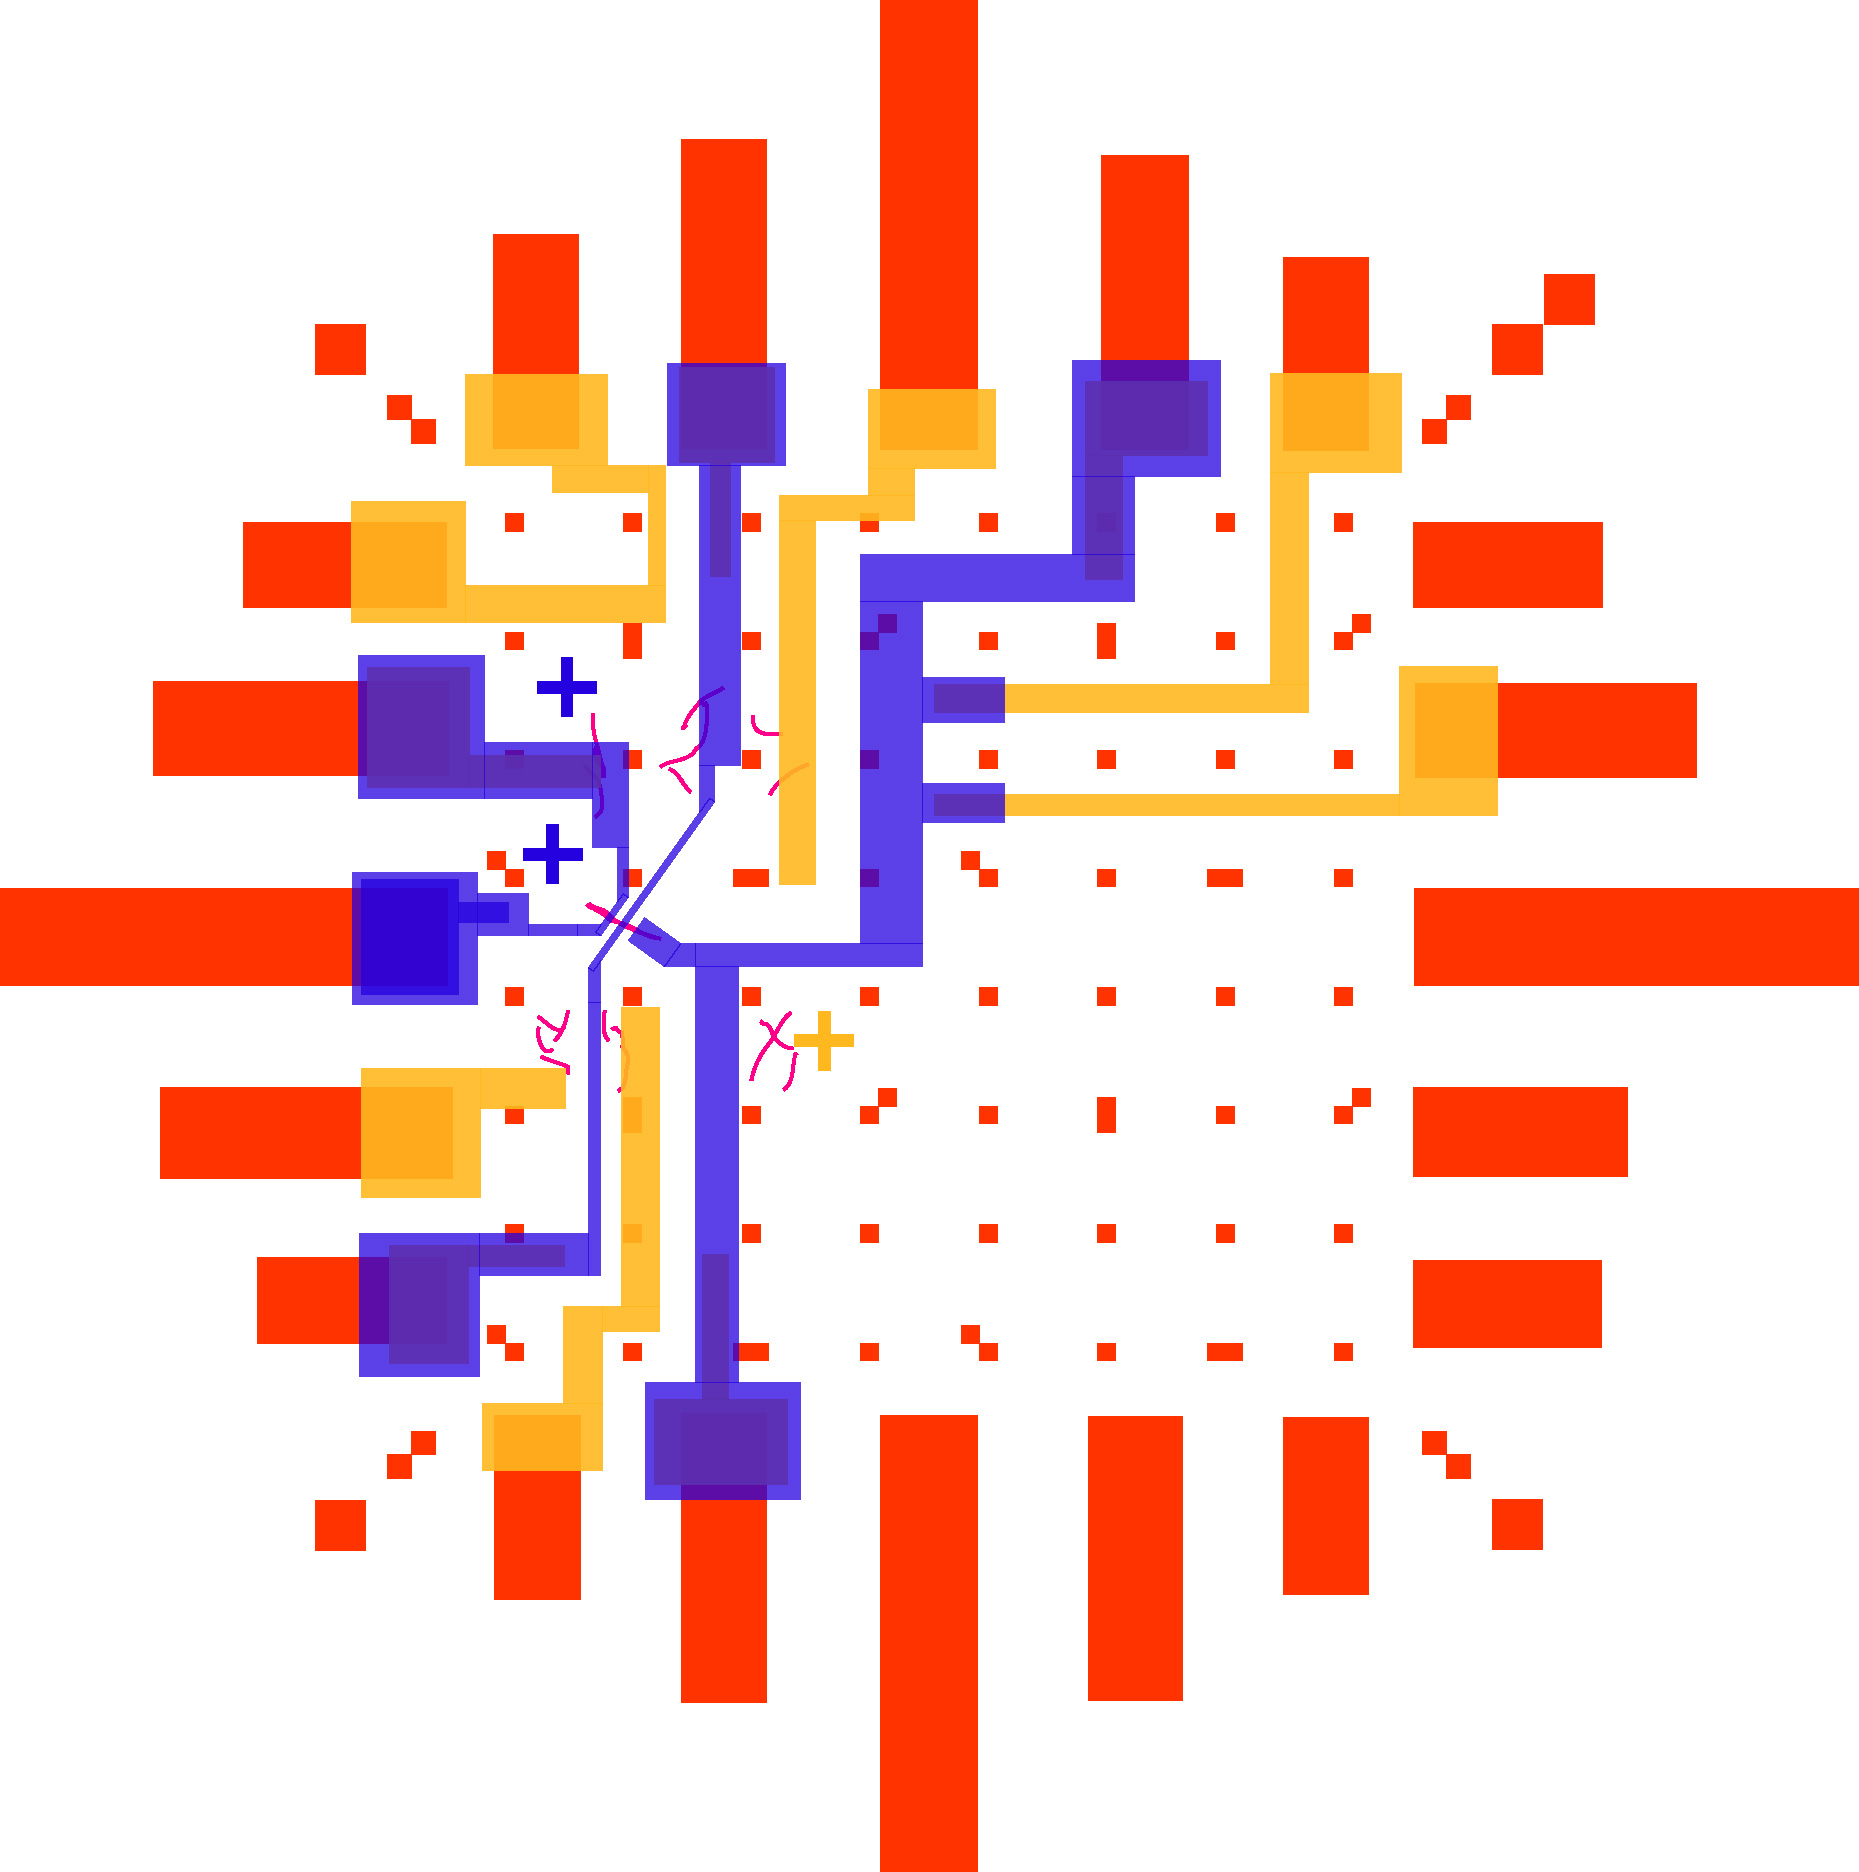

In [3]:
from IPython.display import Image, display

fig_dir = '/Volumes/EDDropbox/Data/MF15/figures/'
display(Image(filename=os.path.join(fig_dir,'MF15_q2.jpg')))

### Niobium Check

In [4]:
data_dir = '/Volumes/EDDropbox/Data/MF15/'
for f in glob.glob(os.path.join(data_dir, '*.txt')):
    print f.split('/')[-1]

MF15_9-19_Nb_check_RvsT.txt


(62, 68)

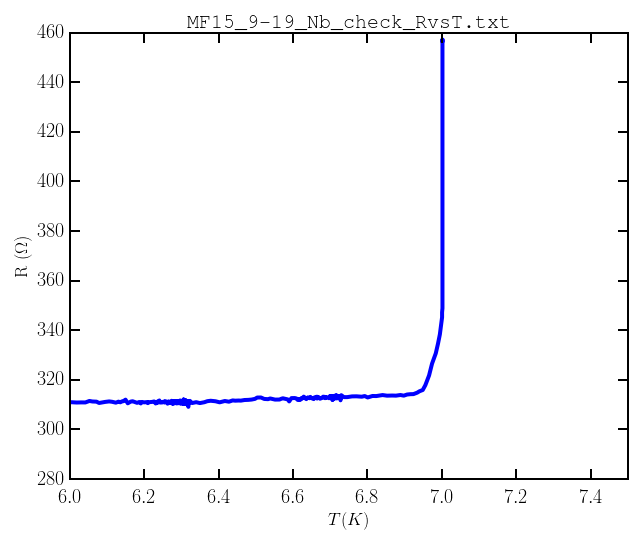

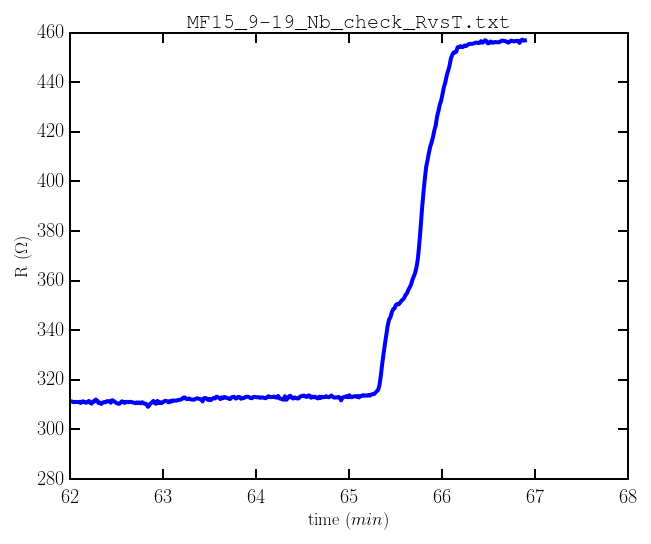

In [13]:
f = os.path.join(data_dir, 'MF15_9-19_Nb_check_RvsT.txt')
# fo = open(f)
# for line in fo:
#     print line
    
# [T R G ? ? t(ms) ?]

data = np.loadtxt(f)
T = data[:,0]
R = data[:,1]
time = data[:,5]/1000.0/60.0

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(T, R)
ax.set_xlabel('$T (K)$')
ax.set_ylabel('R $(\Omega)$')
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
ax.set_xlim(6.0,7.5)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(time, R)
ax.set_xlabel('time $(min)$')
ax.set_ylabel('R $(\Omega)$')
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
ax.set_xlim(62,68)

### 4K Gate

In [14]:
data_dir = '/Volumes/EDDropbox/Data/MF15/dVdI_Gate/'
for f in glob.glob(os.path.join(data_dir, '*.txt')):
    print f.split('/')[-1]

mf15_4p2K_0T_c.txt
mf15_4p2K_0T_a.txt
mf15_4p2K_0T_b.txt


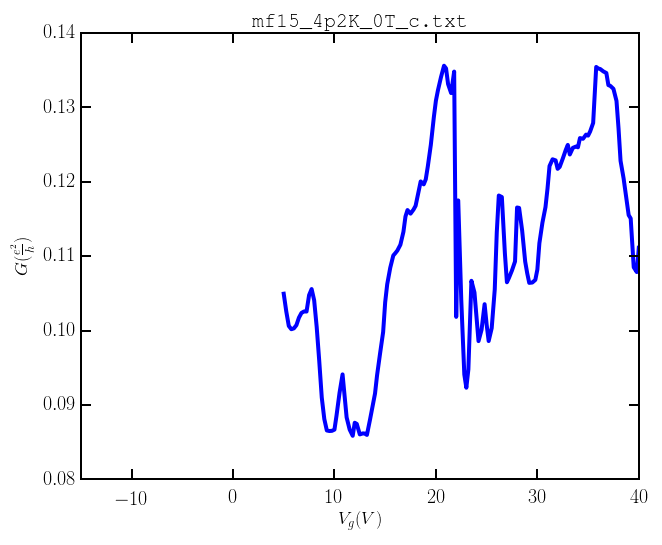

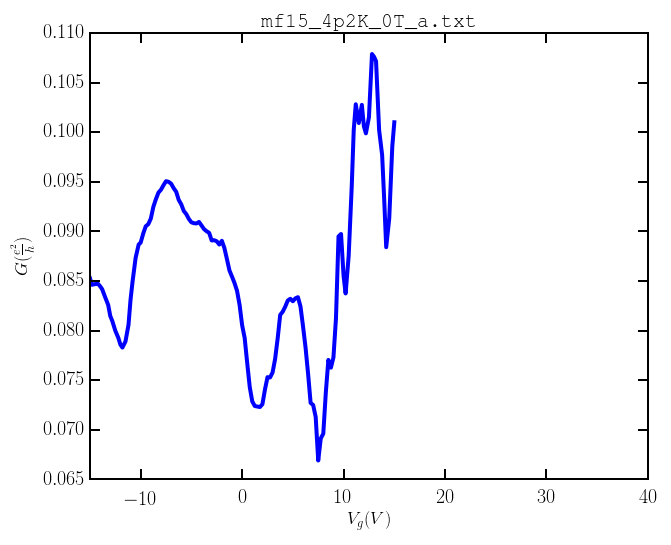

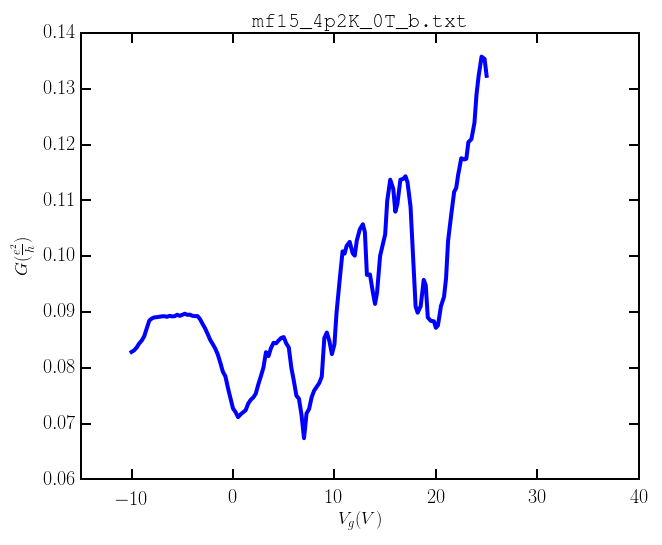

In [19]:
f = os.path.join(data_dir, 'mf15_4p2K_0T_a.txt')
# fo = open(f)
# for line in fo:
#     print line
    
# [Gate R G ? ? T ?]

for f in glob.glob(os.path.join(data_dir, '*.txt')):
    data = np.loadtxt(f)
    gate = data[:,0]
    cond = data[:,2]/3.875e-5
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(gate, cond)
    ax.set_xlabel('$V_g (V)$')
    ax.set_ylabel(r'$G (\frac{e^2}{h})$')
    ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
    ax.set_xlim(-15,40)

### Bias/Gate Sweep

In [104]:
data_dir = '/Volumes/EDDropbox/Data/MF15/dIdV_bias_gate/'
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*.txt'))):
    print i, f.split('/')[-1]

0 mf15_16-17_250mK_0T_matrix_a_Vdc_-15.0015.00_step_0.100mV.txt
1 mf15_16-17_250mK_0T_matrix_b_Vdc_-7.507.50_step_0.100mV.txt
2 mf15_4p2K_0T_matrix_a_Vdc_-10p0010p00_step_0p500mV_Vdc_-10p0010p00_step_0p500mV.txt.txt
3 mf15_16-17_250mK_0T_matrix_c_Vdc_-5.005.00_step_0.050mV.txt
4 mf15_4p2K_0T_matrix_a_Vdc_-10.0010.00_step_0.500mV.txt


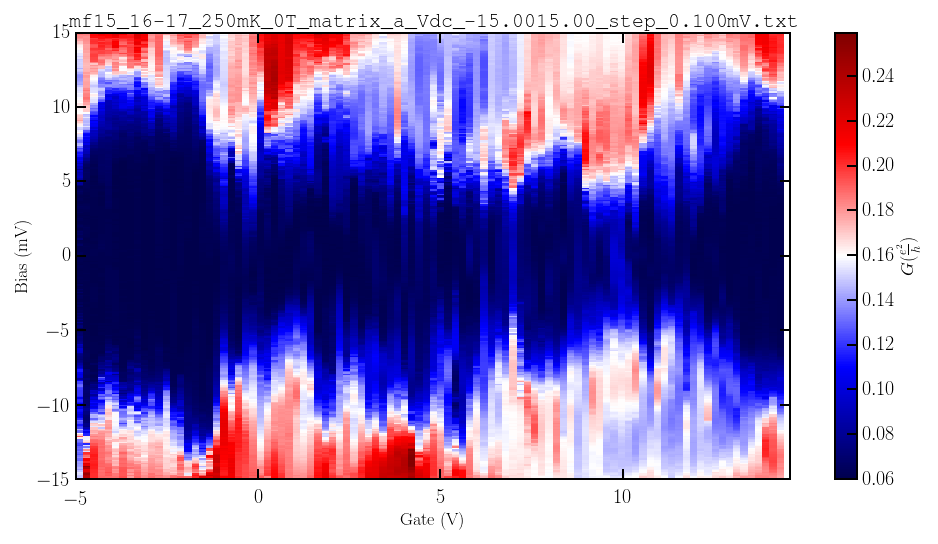

In [108]:
# 0 mf15_16-17_250mK_0T_matrix_a_Vdc_-15.0015.00_step_0.100mV.txt
f = os.path.join(data_dir, 'mf15_16-17_250mK_0T_matrix_a_Vdc_-15.0015.00_step_0.100mV.txt')
# fo = open(f)
# for line in fo:
#     print line

df = pd.read_csv(f, sep='\t')
bias = df.columns[2:].astype(np.float)
gate = df['B-gate']
cond = df.iloc[:,2:].transpose()/3.875e-5
ext = [gate.min(), gate.max(), bias.min(), bias.max()]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(cond, extent = ext, 
               cmap = plt.cm.seismic, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('Gate (V)')
ax.set_ylabel('Bias (mV)') 
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

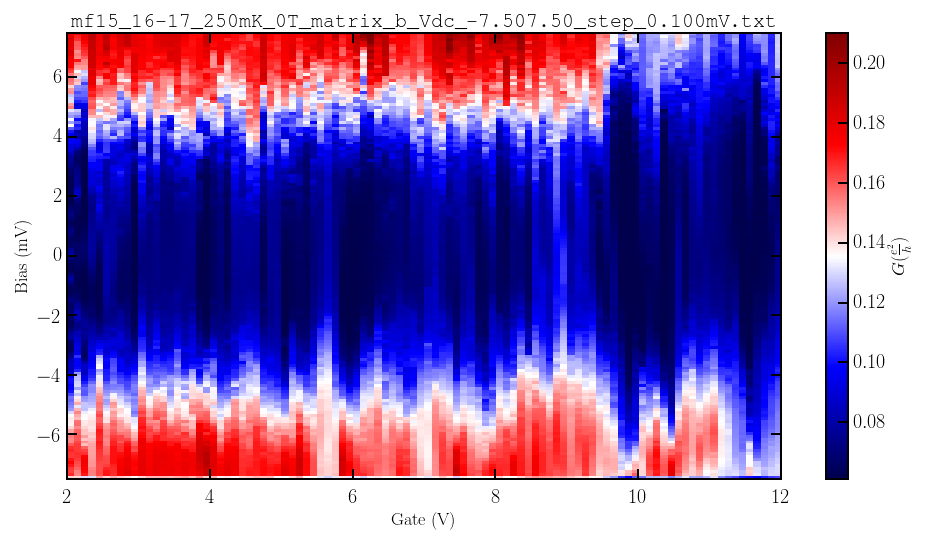

In [109]:
# 1 mf15_16-17_250mK_0T_matrix_b_Vdc_-7.507.50_step_0.100mV.txt

f = os.path.join(data_dir, 'mf15_16-17_250mK_0T_matrix_b_Vdc_-7.507.50_step_0.100mV.txt')
# fo = open(f)
# for line in fo:
#     print line

df = pd.read_csv(f, sep='\t')
bias = df.iloc[1:, 0].astype(np.float)
gate = df.columns[1:].astype(np.float)
cond = df.iloc[1:,2:]/3.875e-5
ext = [gate.min(), gate.max(), bias.min(), bias.max()]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(cond, extent = ext, 
               cmap = plt.cm.seismic, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('Gate (V)')
ax.set_ylabel('Bias (mV)') 
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

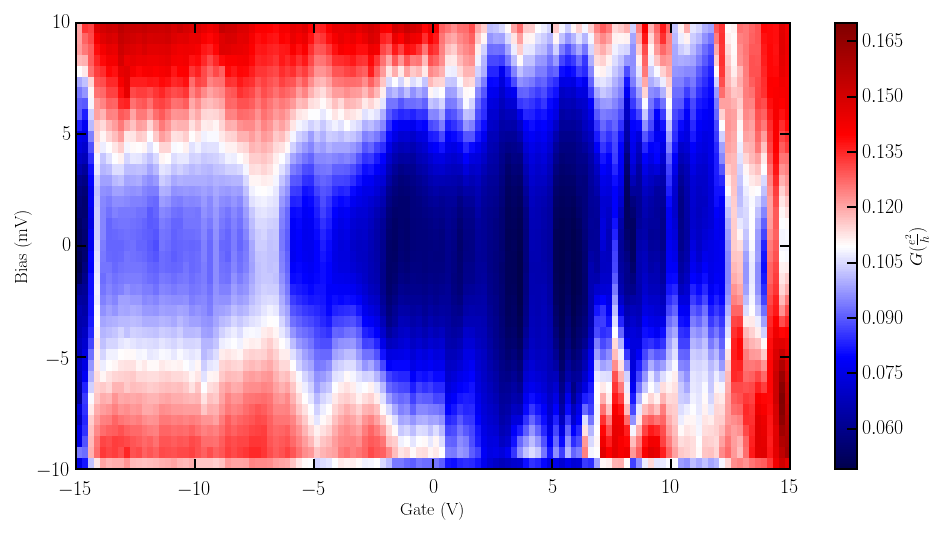

In [110]:
# 2 mf15_4p2K_0T_matrix_a_Vdc_-10p0010p00_step_0p500mV_Vdc_-10p0010p00_step_0p500mV.txt.txt

f = os.path.join(data_dir, 'mf15_4p2K_0T_matrix_a_Vdc_-10p0010p00_step_0p500mV_Vdc_-10p0010p00_step_0p500mV.txt.txt')

df = pd.read_csv(f, sep='\t')
bias = df.iloc[1:, 0].astype(np.float)
gate = df.columns[1:].astype(np.float)
cond = df.iloc[1:,2:]/3.875e-5
ext = [gate.min(), gate.max(), bias.min(), bias.max()]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(cond, extent = ext, 
               cmap = plt.cm.seismic, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('Gate (V)')
ax.set_ylabel('Bias (mV)') 
#ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

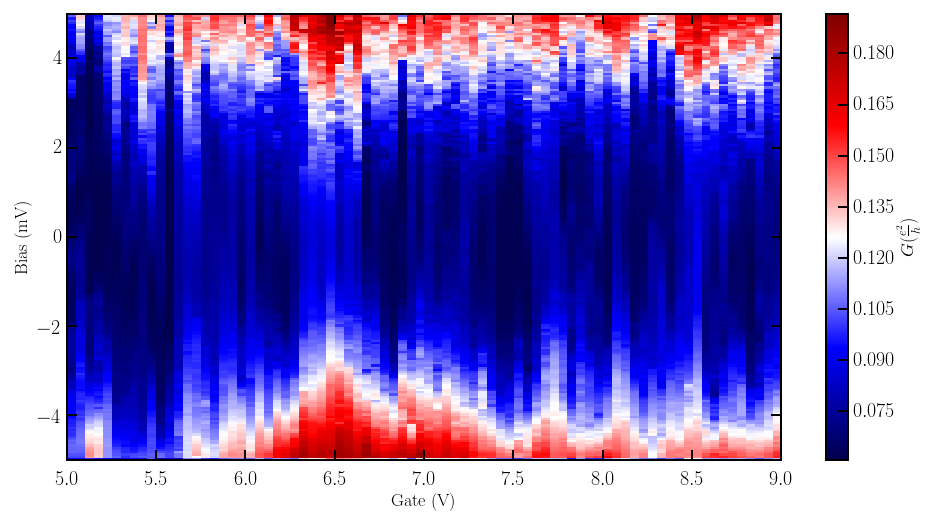

In [111]:
# 3 mf15_16-17_250mK_0T_matrix_c_Vdc_-5.005.00_step_0.050mV.txt

f = os.path.join(data_dir, 'mf15_16-17_250mK_0T_matrix_c_Vdc_-5.005.00_step_0.050mV.txt')

df = pd.read_csv(f, sep='\t')
bias = df.iloc[1:, 0].astype(np.float)
gate = df.columns[1:].astype(np.float)
cond = df.iloc[1:,2:]/3.875e-5
ext = [gate.min(), gate.max(), bias.min(), bias.max()]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(cond, extent = ext, 
               cmap = plt.cm.seismic, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('Gate (V)')
ax.set_ylabel('Bias (mV)') 
#ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

In [112]:
# 4 mf15_4p2K_0T_matrix_a_Vdc_-10.0010.00_step_0.500mV.txt

# INCOMPLETE MEAUREMENT

# f = os.path.join(data_dir, 'mf15_4p2K_0T_matrix_a_Vdc_-10.0010.00_step_0.500mV.txt')

# df = pd.read_csv(f, sep='\t')
# bias = df.iloc[1:, 0].astype(np.float)
# gate = df.columns[1:].astype(np.float)
# cond = df.iloc[1:,2:]/3.875e-5
# ext = [gate.min(), gate.max(), bias.min(), bias.max()]

# fig = plt.figure(figsize=(16,8))
# ax = fig.add_subplot(1,1,1)
# limits = [gate.min(), gate.max(), bias.min(), bias.max()]
# im = ax.imshow(cond, extent = limits, 
#                cmap = plt.cm.seismic, 
#                origin = 'lower', aspect = 'auto', interpolation = 'nearest')
# ax.set_xlabel('Gate (V)')
# ax.set_ylabel('Bias (mV)') 
# #ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
# cb = plt.colorbar(im)
# cb.set_label(r'$G (\frac{e^2}{h})$')

### Bias/Field Sweep

In [113]:
data_dir = '/Volumes/EDDropbox/Data/MF15/dIdV_bias_H/'
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*.txt'))):
    print i, f.split('/')[-1]

0 mf15_16-17_4p2K_0gate_a_bias_-6.006.00_back-gate_0.000V.txt


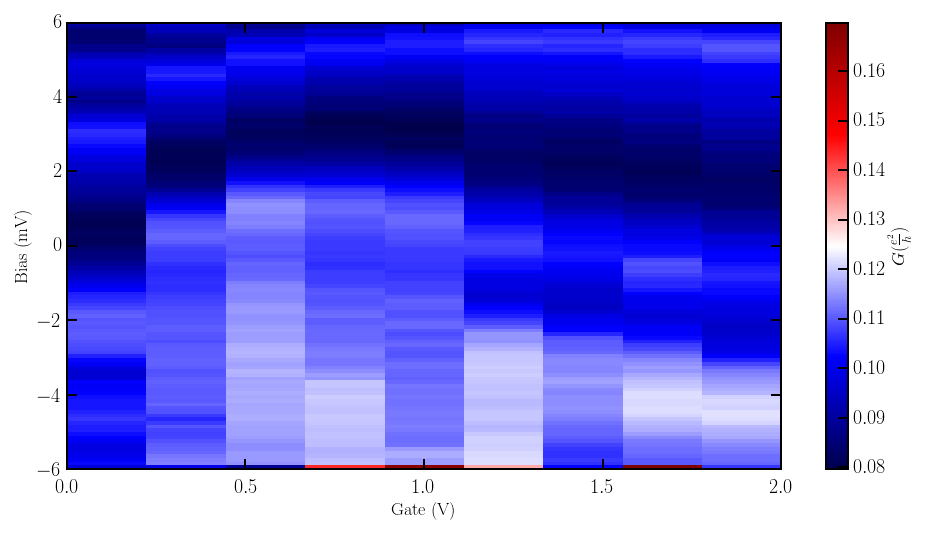

In [126]:
f = os.path.join(data_dir, 'mf15_16-17_4p2K_0gate_a_bias_-6.006.00_back-gate_0.000V.txt')

df = pd.read_csv(f, sep='\t')
field = df.columns[1:].astype(np.float)
bias = df.iloc[1:,0].astype(np.float)
cond = df.iloc[1:,1:]/3.875e-5
ext = [field.min(), field.max(), bias.min(), bias.max()]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(cond, extent = ext, 
               cmap = plt.cm.seismic, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('Gate (V)')
ax.set_ylabel('Bias (mV)') 
#ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

Probably should have taken some better resolution data.